In [1]:
from pickle import load
from numpy import mean
from numpy import std

In [2]:
results = load(open('results.pkl', 'rb'))
print('%d models evaluated' % len(results))
rearranged_results = {}
for model_name, scores in results.items():
    rearranged_results[model_name] = {}
    for metric_dict in scores:
        for metric, value in metric_dict.items():
            if metric not in rearranged_results[model_name]:
                rearranged_results[model_name][metric] = []
            rearranged_results[model_name][metric].append(value)
results = rearranged_results

3 models evaluated


In [3]:
results

{'baseline': {'weighted_accuracy': [0.17707820954254797,
   0.17707820954254797,
   0.17707820954254797,
   0.17695523856369896,
   0.17695523856369896],
  'weighted_f1_score': [0.05327885953641226,
   0.05327885953641226,
   0.05327885953641226,
   0.053210445782710857,
   0.053210445782710857],
  'confunsion_matrix': [array([[   0,  193,    0, ...,    0,    0,    0],
          [   0, 1440,    0, ...,    0,    0,    0],
          [   0,  107,    0, ...,    0,    0,    0],
          ...,
          [   0,   79,    0, ...,    0,    0,    0],
          [   0,    2,    0, ...,    0,    0,    0],
          [   0,    3,    0, ...,    0,    0,    0]]),
   array([[   0,  193,    0, ...,    0,    0,    0],
          [   0, 1440,    0, ...,    0,    0,    0],
          [   0,  107,    0, ...,    0,    0,    0],
          ...,
          [   0,   80,    0, ...,    0,    0,    0],
          [   0,    2,    0, ...,    0,    0,    0],
          [   0,    3,    0, ...,    0,    0,    0]]),
   array([[

In [8]:
metrics = ['weighted_accuracy', 'weighted_f1_score']
for model_name, scores in results.items():
    print(model_name)
    for metric in metrics:
        print(f"Mean {metric}: {mean(scores[metric], axis=0)*100:.1f}")
        print(f"Std {metric}: {std(scores[metric])*100:.1f}")

baseline
Mean weighted_accuracy: 17.7
Std weighted_accuracy: 0.0
Mean weighted_f1_score: 5.3
Std weighted_f1_score: 0.0
one_gram
Mean weighted_accuracy: 22.2
Std weighted_accuracy: 0.5
Mean weighted_f1_score: 17.3
Std weighted_f1_score: 0.4
four_gram
Mean weighted_accuracy: 26.5
Std weighted_accuracy: 0.2
Mean weighted_f1_score: 22.3
Std weighted_f1_score: 0.2


[[  23  135    0 ...    0    0    0]
 [  13 1267    2 ...    0    0    0]
 [   1   77   22 ...    0    0    0]
 ...
 [   0   62    0 ...   15    0    0]
 [   0    2    0 ...    0    0    0]
 [   0    2    0 ...    0    1    0]]


AttributeError: 'NoneType' object has no attribute 'shape'

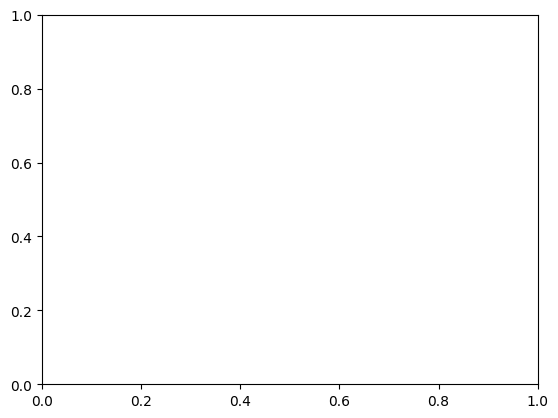

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(print(results["four_gram"]["confunsion_matrix"][0]))
disp.plot()
disp.show()